# Title : Avacado Prices

**By:** Bhavya Balasubramanya

**About Dataset:** This dataset consists of trend in Avocado prices between 2015 to 2018(March). It provides details on average unit price per avocado across different US regions. Original source for this dataset is IRI/FreshLook Marketing Multi-Outlet (MULO) retail scan data. Multi-Outlet (MULO) reporting reflects retail scan sales across the following channels: grocery, mass, club, drug, dollar and military. However, this perticular dataset has been pulled from https://data.world/makeovermonday/2018w40-avocado-prices

In [1]:
#Adding all the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

## Description of Dataset

To describe the data set, let us go ahead and import our data and further explore it.

In [2]:
#Importing Data
data = pd.read_csv("avocado.csv", low_memory=False)

In [3]:
#Find out the number of rows and columns
data.shape

(18249, 13)

In [4]:
#Find the statistics for all the numeric attributes
data.describe()

,AveragePrice,Total Volume,Small Hass,Large Hass,XL Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,Year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


**Data Composition:**

In [5]:
#Display all the attributes and sample of data
data.head(5)

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XL Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region
0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


From the sample above we see that there are 10 numerical attributes and 3 conventional attributes. 

In [6]:
#Let us check the statistics only for Average Price per Avacado
data.AveragePrice.describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

In [7]:
#Does data need any cleaning? Check the columns we are interested in.
print('No value rows in AveragePrice column:', data.AveragePrice.isnull().sum())
print('No value rows in Type column:', data.Type.isnull().sum())

No value rows in AveragePrice column: 0
No value rows in Type column: 0


c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


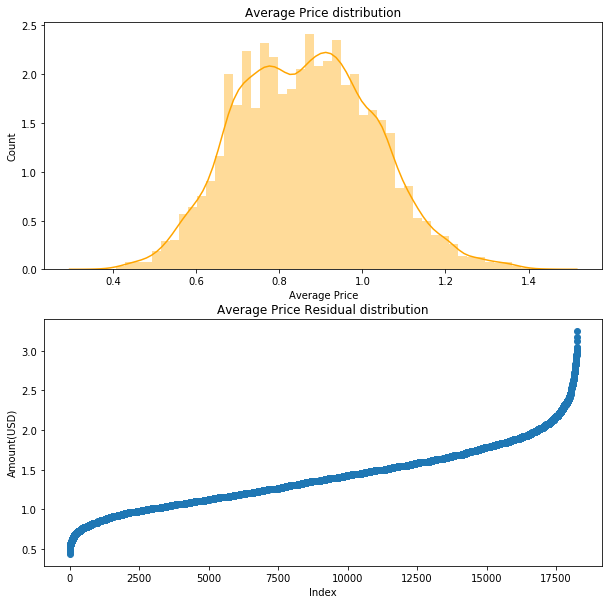

In [8]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
ax = sns.distplot(np.log(data.AveragePrice +1),color='orange')
ax.set(title='Average Price distribution', xlabel='Average Price', ylabel='Count')

plt.subplot(2,1,2)
plt.scatter(range(data.shape[0]), np.sort(data.AveragePrice.values))
plt.title('Average Price Residual distribution') 
plt.xlabel('Index')
plt.ylabel('Amount(USD)')

plt.show()

### Research Proposal<br>

Did people pay more for avocados in year 2016 compared to year 2017 for all types of avocadoes?<br><br>


### Hypothesis<br>

I expect the prices to be more in 2016 compared to 2017 since there were more floods in US in 2016 than any year on record<br><br>

### Null Hypothesis<br>

There will be absolutely no difference in the prices between the two years.<br><br>

### Testing Method<br>

We are going to find the distribution of prices for the both years for different types of avocados and analyze and compare the resulting distribution to find the difference in their mean values and the degree of variance. <br><br>

### Expected Outcome <br>
We will therefore, be able to determine if the difference (provided any) is significant or due to noise, which of course, we expect to be significant <br><br>

c:\users\bharath\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


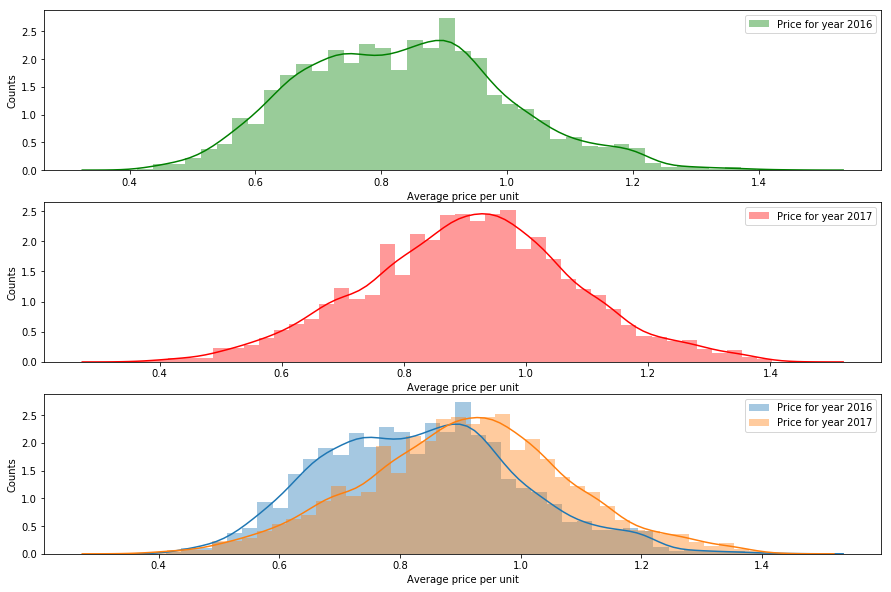

In [9]:
#selecting data frame for year 2016
sixteen = data[data.Date.str.contains('2016')]
#selecting data frame for year 2017
seventeen = data[data.Date.str.contains('2017')]

plt.figure(figsize=(15,10))

plt.subplot(311)
sns.distplot(np.log(sixteen[['AveragePrice']] + 1), color='g', label='Price for year 2016')
plt.legend(loc='upper right')
plt.ylabel('Counts')
plt.xlabel('Average price per unit')

plt.subplot(312)
sns.distplot(np.log(seventeen[['AveragePrice']] + 1), color='r', label='Price for year 2017')
plt.legend(loc='upper right')
plt.ylabel('Counts')
plt.xlabel('Average price per unit')

plt.subplot(313)
sns.distplot(np.log(sixteen[['AveragePrice']] + 1), label='Price for year 2016')
sns.distplot(np.log(seventeen[['AveragePrice']] + 1), label='Price for year 2017')
plt.legend(loc='upper right')
plt.ylabel('Counts')
plt.xlabel('Average price per unit')
plt.show()

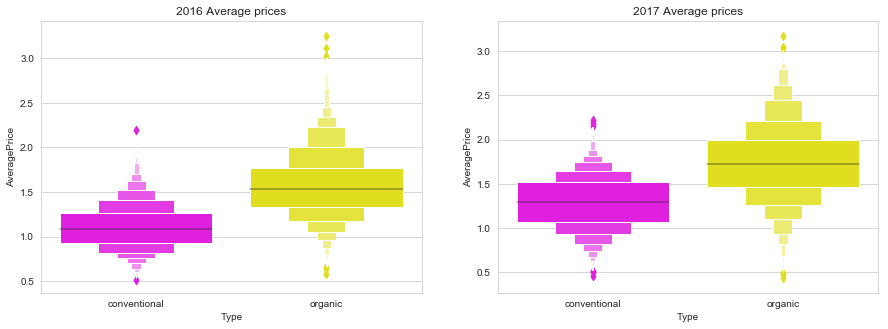

In [10]:
#Data distribution for different type of avocados based on Avg price
sns.set_style("whitegrid")

plt.figure(figsize=(15,5))

plt.subplot(121)
ax = sns.boxenplot(x="Type", y="AveragePrice", data=sixteen, palette = ('magenta','yellow'))
plt.title('2016 Average prices')

plt.subplot(122)
ay = sns.boxenplot(x="Type", y="AveragePrice", data=seventeen, palette = ('magenta','yellow'))
plt.title('2017 Average prices')

plt.show()

In [11]:
#Statistics for 2016
sixteen.AveragePrice.describe()

count    5616.000000
mean        1.338640
std         0.393708
min         0.510000
25%         1.040000
50%         1.300000
75%         1.560000
max         3.250000
Name: AveragePrice, dtype: float64

In [12]:
#Statistics for 2017
seventeen.AveragePrice.describe()

count    5722.000000
mean        1.515128
std         0.432906
min         0.440000
25%         1.220000
50%         1.490000
75%         1.770000
max         3.170000
Name: AveragePrice, dtype: float64

In [13]:
#Calculate the T-test and p-value
tval, pval = stats.ttest_ind(sixteen.AveragePrice,seventeen.AveragePrice , equal_var=False)
print('T-test value for 2016 and 2017 prices are :', tval)
print('P-value for 2016 and 2017 prices are :', pval)

T-test value for 2016 and 2017 prices are : -22.71779928591431
P-value for 2016 and 2017 prices are : 9.445423135319975e-112


### Conclusion<br>

Though our hypothesis turned out to be incorrect, it wasn't a null hypothesis. We got a very low p-value which proves that the difference between the means for years 2016 and 2017 in terms of average price per unit was actually significant and not a noise. This is true for both conventional and organic avocados. Further analysis would be to do the break down of years into months or even quarters which might include cleaning data and formatting the dates.